In [ ]:
from gcrnn.utils import simulate_data
from gcrnn.gcrnn import GCRNN
import numpy as np
import pandas as pd
import torch


## Prepare dataset

In [11]:
train_data=simulate_data(n_samples=300, n_features=20, scale=2, shape=2)
test_data=simulate_data(n_samples=300, n_features=20, scale=2, shape=2)

## Standardize dataset 

In [12]:
# # standardize dataset in real application
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# # Fit the scaler on the training data
# scaler.fit(train_data['X'])
# train_data['X'] = scaler.fit_transform(train_data['X'])
# test_data['X'] = scaler.fit_transform(test_data['X'])

## Instantiate the GCRNN trainer

In [13]:
lam=np.exp(np.linspace(np.log(0.01),np.log(0.5), 50))
gmcp_net = GCRNN(task_type='cox',device=torch.device("cpu"), input_dim=train_data['X'].shape[1], output_dim=1, hidden_dims=[10,5], activation="relu",
    optimizer="Adam",learning_rate=0.001, batch_size=train_data['X'].shape[0], 
    alpha=0.01, lam=lam, penalty="MCP",drop_input=True)



## Train model

In [14]:
#param_grid={'alpha':np.exp(np.linspace(np.log(0.001),np.log(0.1), 10))}
param_grid={'alpha':[0.02]}
gmcp_net= gmcp_net.fit_and_validate(X=train_data['X'], y=pd.DataFrame({'E': train_data['E'], 'T': train_data['T']}), 
                              param_grid=param_grid, num_epochs=200, verbose=True, print_interval=200)

Epoch: 200: loss=4.12492036819458
Epoch: 400: loss=3.786781072616577
Epoch: 600: loss=3.6120448112487793
Epoch: 800: loss=3.539206027984619
Epoch: 1000: loss=3.498922824859619
Epoch: 1200: loss=3.473836898803711
Epoch: 1400: loss=3.4617154598236084
Epoch: 1600: loss=3.455230951309204
Epoch: 1800: loss=3.4428560733795166
Epoch: 2000: loss=3.438446283340454
Lambda0=0.010000000000000004, size=18
Epoch: 200: loss=3.437218044643072
Lambda1=0.010831107274360414, size=18
Epoch: 200: loss=3.434450143658525
Lambda2=0.011731288478870311, size=18
Epoch: 200: loss=3.4398650220416096
Lambda3=0.012706284398111268, size=18
Epoch: 200: loss=3.447405276750683
Lambda4=0.013762312937447512, size=18
Epoch: 200: loss=3.4562726268278654
Lambda5=0.014906108776881212, size=18
Epoch: 200: loss=3.4665740716422064
Lambda6=0.01614496632056856, size=18
Epoch: 200: loss=3.4788215079075426
Lambda7=0.017486786215901412, size=18
Epoch: 200: loss=3.4930389566709383
Lambda8=0.018940125738823508, size=18
Epoch: 200: loss

## Solution path

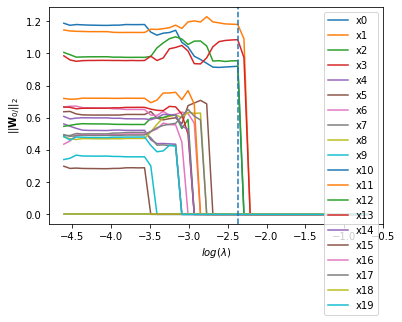

[ True  True  True  True False False False False False False False False
 False False False False False False False False]
best_lam=0.09350611267692986, best_params={'alpha': 0.02}


In [15]:
gmcp_net.plot_solution_path(legend=True, best=True)
print(gmcp_net.get_selection())
print(f'best_lam={gmcp_net.lam[gmcp_net.best_lam_ind]}, best_params={gmcp_net.best_params}')

## Evaluating the model

In [16]:
CI_train = gmcp_net.score(X=train_data['X'], y=pd.DataFrame({'E': train_data['E'], 'T': train_data['T']}), best=True)
CI_test=gmcp_net.score(X=test_data['X'], y=pd.DataFrame({'E': test_data['E'], 'T': test_data['T']}), best=True)
print(f'train_CI={CI_train} test_CI={CI_test}')

train_CI=0.8682592427850022 test_CI=0.8297564947857837
